## 🎵 Content-Based Music Recommendation System

### Introduction

In today's digital age, music streaming platforms have become immensely popular, offering vast libraries of songs from various genres, artists, and eras. With such an extensive collection, finding the right song at the right moment can be overwhelming. This is where music recommendation systems come into play, helping users discover music tailored to their tastes.

This notebook focuses on building a **content-based music recommendation system** using the "Top 10000 Songs on Spotify 1960-Now" dataset. Unlike collaborative filtering, which relies on user interactions, content-based filtering makes recommendations based on the content of the items themselves. In this case, we'll recommend songs based on features like **Artist Genres**, **Danceability**, **Energy**, and more.

In [1]:
# Importing necessary libraries for data manipulation
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
songs = pd.read_csv('./top_10000_1960-now.csv')

In [3]:
# Display the first few rows
songs.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [4]:
# Check the shape of the dataset
songs.shape

(9999, 35)

In [5]:
# Get detailed information about the dataset
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [6]:
# Checking the dataset for any duplicate rows
songs.duplicated().sum()

48

In [7]:
songs.drop_duplicates(inplace=True)

In [8]:
# To see all the columns present in the songs DataFrame
songs.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [9]:
# Display the 'Artist Genres' column to examine its content
songs['Artist Genres']

0             acid house,ambient house,big beat,hip house
1                             dance pop,miami hip hop,pop
2                                           dance pop,pop
3       album rock,art rock,british invasion,classic r...
4           album rock,british invasion,classic rock,rock
                              ...                        
9994    german dance,pop dance,pop edm,uk dance,pop da...
9995                    australian dance,melbourne bounce
9996    disco house,vocal house,dance pop,europop,new ...
9997    big room,brostep,dutch edm,edm,house,pop dance...
9998    australian dance,australian pop,dance pop,euro...
Name: Artist Genres, Length: 9951, dtype: object

In [10]:
# Display the 'Album Genres' column to examine its content
songs['Album Genres']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
Name: Album Genres, Length: 9951, dtype: float64

In [11]:
# Check for missing values in the 'Album Genres' column
songs['Album Genres'].isnull().sum()

9951

A quick analysis of the **Album Genres** column shows that it contains a significant number of missing entries (9951 missing values out of 9999 rows). This high number of missing values makes **Album Genres** unreliable for our recommendation system. Given that **Artist Genres** has more complete data and provides valuable insight into the style of the music, I have decided to use **Artist Genres** as a key feature in our model.

### 2. Feature Selection and Dataset Refinement

In [12]:
# Selecting the most relevant features for the recommendation system.
# These features represent the musical characteristics and metadata that define a song's content.
selected_features = ['Track Name', 'Artist Name(s)', 'Artist Genres', 'Danceability', 'Energy',
                     'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Loudness']

# Filtering the dataset to include only the selected features
songs = songs[selected_features]

# Displaying the first few rows of the updated dataset to verify the selection
songs.head()

,Track Name,Artist Name(s),Artist Genres,Danceability,Energy,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Loudness
0,Justified & Ancient - Stand by the Jams,The KLF,"acid house,ambient house,big beat,hip house",0.617,0.872,0.0158,0.112000,0.4080,0.504,111.458,4.0,-12.305
1,I Know You Want Me (Calle Ocho),Pitbull,"dance pop,miami hip hop,pop",0.825,0.743,0.0142,0.000021,0.2370,0.800,127.045,4.0,-5.995
2,From the Bottom of My Broken Heart,Britney Spears,"dance pop,pop",0.677,0.665,0.5600,0.000001,0.3380,0.706,74.981,4.0,-5.171
3,Apeman - 2014 Remastered Version,The Kinks,"album rock,art rock,british invasion,classic r...",0.683,0.728,0.5680,0.000051,0.0384,0.833,75.311,4.0,-8.920
4,You Can't Always Get What You Want,The Rolling Stones,"album rock,british invasion,classic rock,rock",0.319,0.627,0.6750,0.000073,0.2890,0.497,85.818,4.0,-9.611


In [13]:
# Checking for any missing (null) values in the dataset
songs.isnull().sum()

Track Name            1
Artist Name(s)        1
Artist Genres       549
Danceability          2
Energy                2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Time Signature        2
Loudness              2
dtype: int64

In [14]:
# Dropping rows that contain missing values to ensure the dataset is complete
songs.dropna(inplace=True)

In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9402 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        9402 non-null   object 
 1   Artist Name(s)    9402 non-null   object 
 2   Artist Genres     9402 non-null   object 
 3   Danceability      9402 non-null   float64
 4   Energy            9402 non-null   float64
 5   Acousticness      9402 non-null   float64
 6   Instrumentalness  9402 non-null   float64
 7   Liveness          9402 non-null   float64
 8   Valence           9402 non-null   float64
 9   Tempo             9402 non-null   float64
 10  Time Signature    9402 non-null   float64
 11  Loudness          9402 non-null   float64
dtypes: float64(9), object(3)
memory usage: 954.9+ KB


In [16]:
# Checking the shape after dropping the null values
songs.shape

(9402, 12)

In [17]:
songs.corr()

C:\Users\TAPAN\AppData\Local\Temp\ipykernel_2348\2131039685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr()


,Danceability,Energy,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Loudness
Danceability,1.000000,0.132622,-0.194206,0.019647,-0.092615,0.445419,-0.181193,0.163249,0.096779
Energy,0.132622,1.000000,-0.626592,0.041816,0.141797,0.300115,0.171630,0.191371,0.678941
Acousticness,-0.194206,-0.626592,1.000000,-0.042656,-0.022675,-0.134216,-0.106610,-0.174483,-0.450220
Instrumentalness,0.019647,0.041816,-0.042656,1.000000,-0.001306,0.017123,0.043469,0.008953,-0.088153
Liveness,-0.092615,0.141797,-0.022675,-0.001306,1.000000,0.028573,0.027823,-0.000738,0.061175
Valence,0.445419,0.300115,-0.134216,0.017123,0.028573,1.000000,0.056394,0.123036,0.017284
Tempo,-0.181193,0.171630,-0.106610,0.043469,0.027823,0.056394,1.000000,-0.029048,0.090539
Time Signature,0.163249,0.191371,-0.174483,0.008953,-0.000738,0.123036,-0.029048,1.000000,0.118362
Loudness,0.096779,0.678941,-0.450220,-0.088153,0.061175,0.017284,0.090539,0.118362,1.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\TAPAN\AppData\Local\Temp\ipykernel_2348\2472129809.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(songs.corr(), annot=True, cmap='coolwarm',


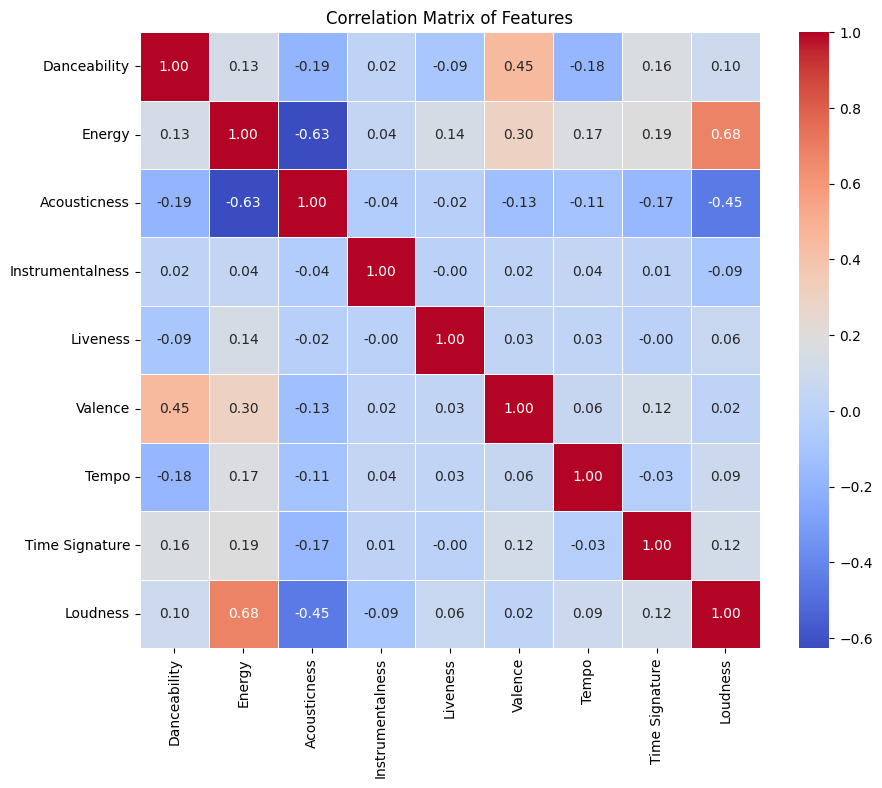

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(songs.corr(), annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

- There's a strong positive correlation between Energy and Loudness. This suggests that as the energy of a song increases, its loudness tends to increase as well.
- Acousticness has a moderate negative correlation with Loudness. Higher acousticness is generally associated with lower loudness.
- There is a moderate positive correlation between Danceability and Valence. Songs with higher danceability tend to have a more positive mood (Valence).

In [20]:
numerical_features = ['Danceability', 'Energy', 'Acousticness', 'Instrumentalness',
                      'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Loudness']

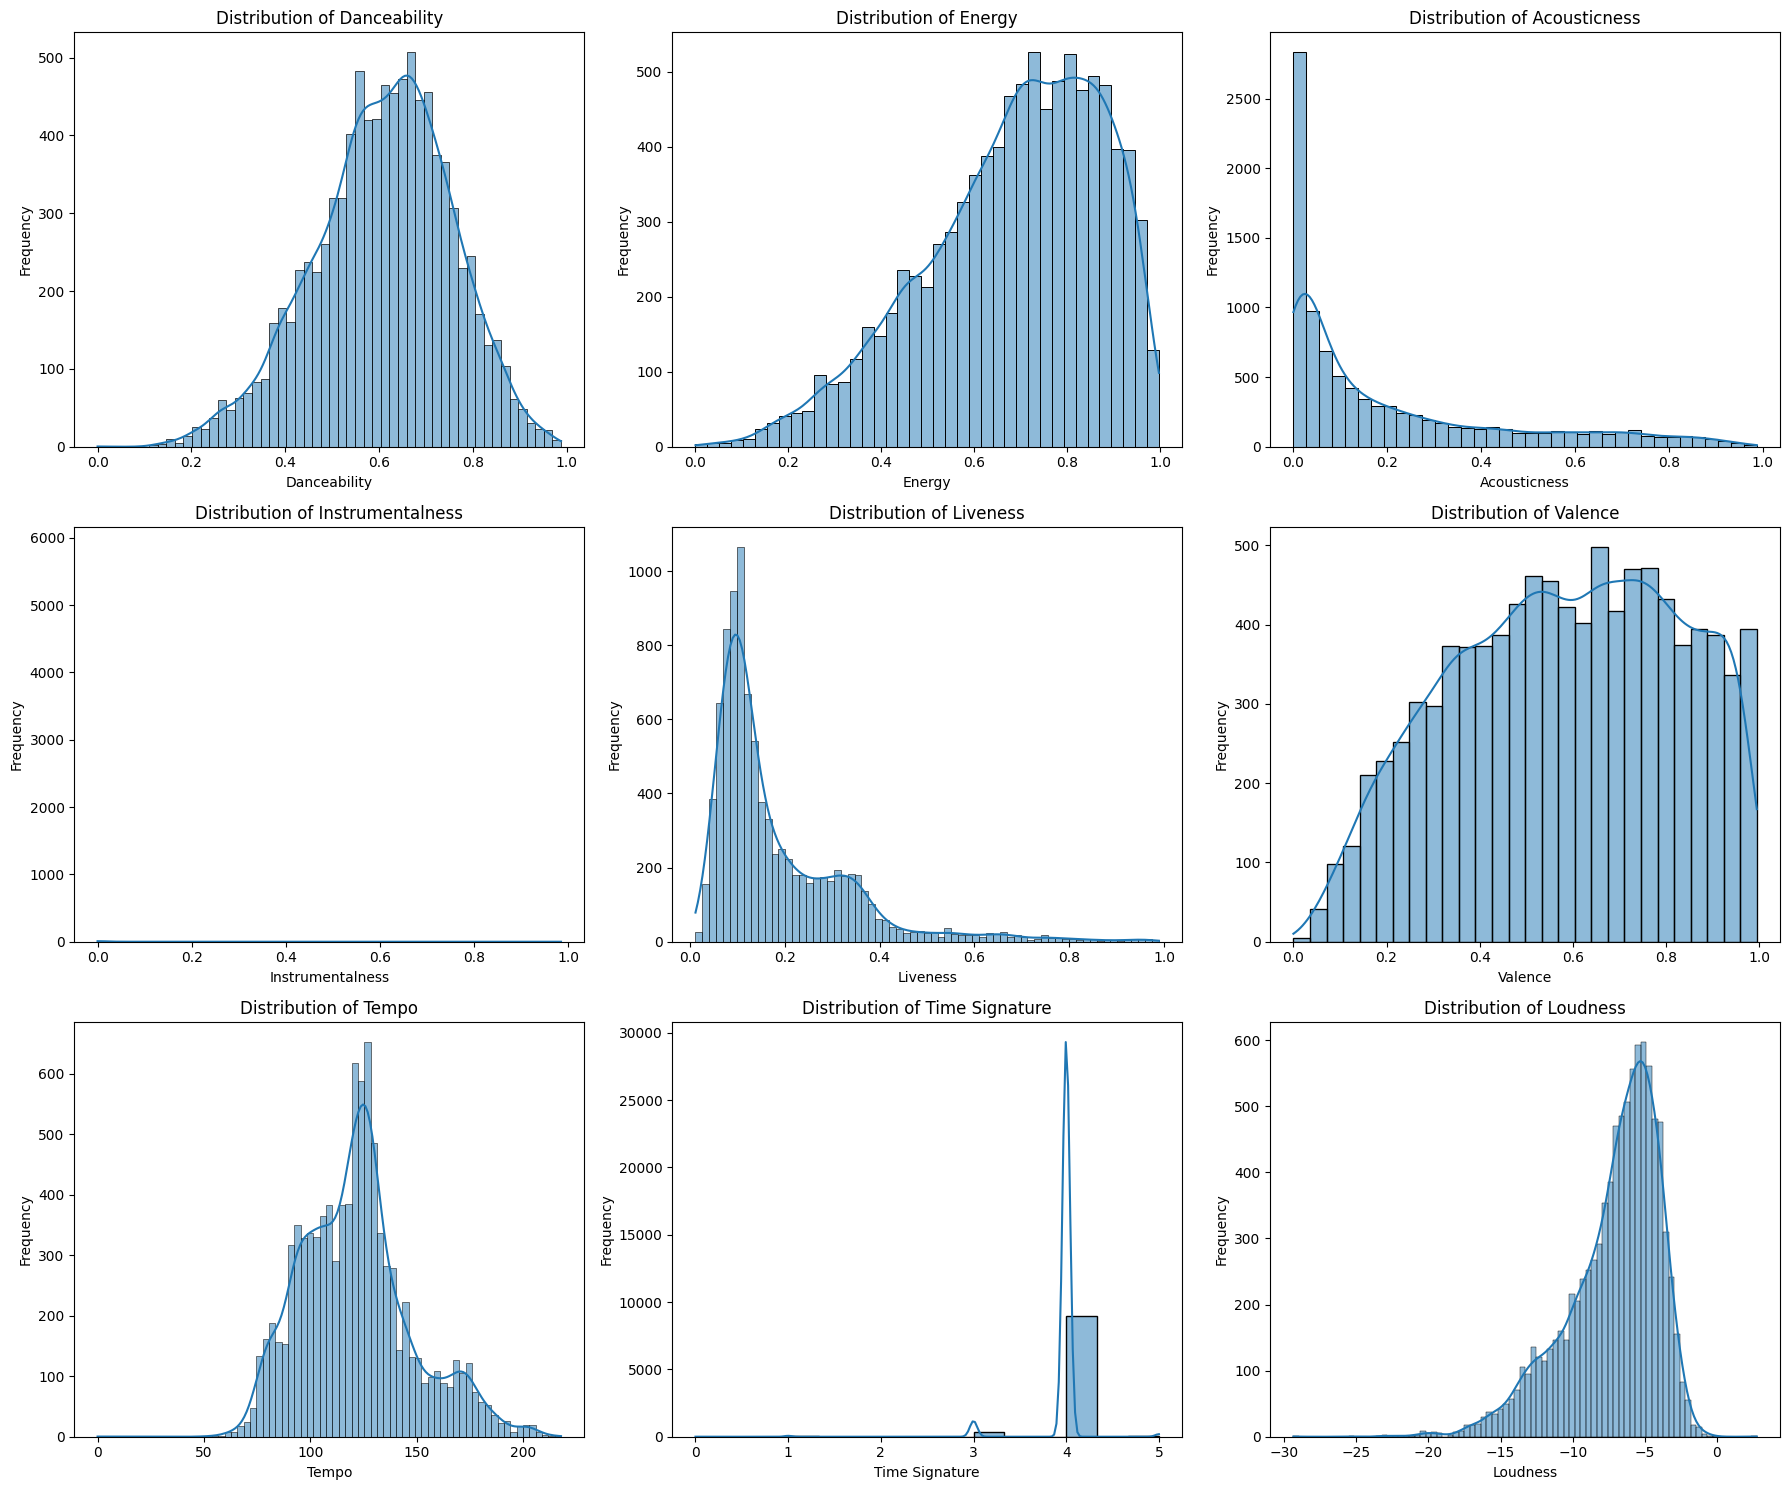

In [21]:
# Set up the matplotlib figure with subplots
plt.figure(figsize=(18, 15))

# Create subplots for each feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, i+1 is the position
    sns.histplot(songs[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [24]:
# Fit and transform the numerical features
songs[numerical_features] = scaler.fit_transform(songs[numerical_features])

In [25]:
songs['Artist Genres']

0             acid house,ambient house,big beat,hip house
1                             dance pop,miami hip hop,pop
2                                           dance pop,pop
3       album rock,art rock,british invasion,classic r...
4           album rock,british invasion,classic rock,rock
                              ...                        
9994    german dance,pop dance,pop edm,uk dance,pop da...
9995                    australian dance,melbourne bounce
9996    disco house,vocal house,dance pop,europop,new ...
9997    big room,brostep,dutch edm,edm,house,pop dance...
9998    australian dance,australian pop,dance pop,euro...
Name: Artist Genres, Length: 9402, dtype: object

In [26]:
songs['Artist Name(s)']

0                            The KLF
1                            Pitbull
2                     Britney Spears
3                          The Kinks
4                 The Rolling Stones
                    ...             
9994                      Topic, A7S
9995                       Vandalism
9996    Spiller, Sophie Ellis-Bextor
9997                          Tiësto
9998                   Kylie Minogue
Name: Artist Name(s), Length: 9402, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Apply TF-IDF to Artist Genres
tfidf_vectorizer_genres = TfidfVectorizer(stop_words='english')
tfidf_genres = tfidf_vectorizer_genres.fit_transform(songs['Artist Genres'])

In [29]:
# Apply TF-IDF to Artist Name(s)
tfidf_vectorizer_artists = TfidfVectorizer(stop_words='english')
tfidf_artists = tfidf_vectorizer_artists.fit_transform(songs['Artist Name(s)'])

In [30]:
print('TF-IDF shape for Artist Genres:', tfidf_genres.shape)
print('TF-IDF shape for Artist Name(s):', tfidf_artists.shape)

TF-IDF shape for Artist Genres: (9402, 600)
TF-IDF shape for Artist Name(s): (9402, 3919)


In [31]:
# Convert the TF-IDF matrices to DataFrames
tfidf_genres_df = pd.DataFrame(tfidf_genres.toarray(
), index=songs.index, columns=tfidf_vectorizer_genres.get_feature_names_out())
tfidf_artists_df = pd.DataFrame(tfidf_artists.toarray(
), index=songs.index, columns=tfidf_vectorizer_artists.get_feature_names_out())

In [32]:
# Concatenate the new TF-IDF features with the original songs DataFrame
songs = pd.concat([songs, tfidf_genres_df, tfidf_artists_df], axis=1)

In [33]:
# Drop the original 'Artist Genres' and 'Artist Name(s)' columns
songs.drop(['Artist Genres', 'Artist Name(s)'], axis=1, inplace=True)

In [34]:
# Check the new dataframe
songs.head()

,Track Name,Danceability,Energy,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Loudness,...,zikode,zombie,zombies,zone,zoo,zoë,zucker,zz,ötzi,öyster
0,Justified & Ancient - Stand by the Jams,0.624494,0.874621,0.016005,0.113706,0.405322,0.506533,0.511479,0.8,0.530946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I Know You Want Me (Calle Ocho),0.835020,0.745231,0.014384,0.000022,0.230297,0.804020,0.583008,0.8,0.727293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,From the Bottom of My Broken Heart,0.685223,0.666994,0.567375,0.000001,0.333675,0.709548,0.344087,0.8,0.752933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apeman - 2014 Remastered Version,0.691296,0.730185,0.575480,0.000052,0.027021,0.837186,0.345601,0.8,0.636276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,You Can't Always Get What You Want,0.322874,0.628879,0.683890,0.000074,0.283521,0.499497,0.393818,0.8,0.614774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
songs.shape

(9402, 4529)

There are around 4529 columns (features), many of which come from the TF-IDF vectors, applying PCA (Principal Component Analysis) or another dimensionality reduction technique can significantly help in reducing the dimensionality, improving computational efficiency, and possibly removing noise.

In [36]:
from sklearn.decomposition import PCA

In [37]:
# Drop non-numeric columns (like 'Track Name') before applying PCA
songs_numeric = songs.drop(columns=['Track Name'])

In [38]:
# Apply PCA to reduce dimensions (example: retain 95% variance)
pca = PCA(n_components=0.95)
songs_pca = pca.fit_transform(songs_numeric)

In [39]:
# Check the shape after PCA
print(f"Original shape: {songs.shape}")
print(f"Shape after PCA: {songs_pca.shape}")

Original shape: (9402, 4529)
Shape after PCA: (9402, 1630)


As we can see, the number of features(columns) have significantly reduced.

In [40]:
# Convert the PCA result to a DataFrame
songs_pca_df = pd.DataFrame(songs_pca)

In [41]:
# Add 'Track Name' back to the DataFrame
songs_pca_df['Track Name'] = songs['Track Name'].values

In [42]:
# Check the resulting DataFrame
songs_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1621,1622,1623,1624,1625,1626,1627,1628,1629,Track Name
0,-0.112154,-0.158382,-0.071891,-0.093664,0.369966,0.018523,-0.209316,0.072643,0.281249,0.253874,...,0.002730,-0.002604,0.000170,-0.003323,-0.001103,-0.001544,-0.002409,0.002659,0.000488,Justified & Ancient - Stand by the Jams
1,-0.475832,-0.041059,-0.243846,0.112210,0.111361,-0.192432,0.279436,0.116404,0.059999,-0.033734,...,0.004627,-0.001802,0.001165,0.001750,0.000184,-0.001019,0.003188,0.003888,-0.002030,I Know You Want Me (Calle Ocho)
2,-0.410883,0.534115,-0.074768,0.167975,-0.460609,-0.114260,-0.027515,0.266315,0.218232,-0.210999,...,-0.000607,-0.000100,0.000417,-0.000248,-0.000567,0.000052,0.000255,-0.000062,0.000467,From the Bottom of My Broken Heart
3,0.534821,-0.169729,-0.278580,0.014466,-0.334933,-0.247686,0.088679,-0.053106,0.025130,-0.037776,...,0.000394,-0.000260,-0.000378,0.000509,0.000132,0.000304,0.000875,0.000848,-0.000588,Apeman - 2014 Remastered Version
4,0.683197,0.066502,-0.027334,-0.142956,-0.183661,-0.222093,-0.079338,0.231066,0.043896,0.001858,...,-0.000797,0.000710,0.000373,0.000059,-0.000361,-0.000366,0.000393,-0.000683,0.000586,You Can't Always Get What You Want


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
def recommend(song_name):
    # Get the index of the song in the DataFrame
    song_index = songs_pca_df[songs_pca_df['Track Name'] == song_name].index[0]

    # Drop the Track Name column to work with numerical data
    songs_list = songs_pca_df.drop(columns=['Track Name'])

    # Calculate cosine similarity
    similarities = cosine_similarity(songs_list)

    # Get indices of the top 5 most similar songs, excluding the first one (which is the same song)
    similar_songs_indices = similarities[song_index].argsort()[::-1][1:]

    recommended_songs = []
    print(f"Top 5 recommended songs similar to '{song_name}':")
    for index in similar_songs_indices:
        recommended_song = songs_pca_df.iloc[index]['Track Name']
        # Add only if the song is not the exact same as the original and is not already recommended
        if recommended_song not in recommended_songs and recommended_song != song_name:
            print(recommended_song)
            recommended_songs.append(recommended_song)
        # Stop after getting 5 unique recommendations
        if len(recommended_songs) == 5:
            break

In [45]:
recommend('...Ready For It?')

Top 5 recommended songs similar to '...Ready For It?':
Bad Blood
Getaway Car
Wildest Dreams
Eyes Open
You Belong With Me
